##### Algorithms and Data Structures (Winter - Spring 2022)

* [Colab view](https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ADS_project_1.ipynb)
* [nbviewer view](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ADS_project_1.ipynb)
* [ADS Page 1](ADS_intro_1.ipynb)
* [ADS Page 2](ADS_intro_2.ipynb)
* [ACSL](Exercises.ipynb)
* [Repo](https://github.com/4dsolutions/elite_school/)

# A Final Project

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51694028948/in/album-72157720157993759/" title="P1310648"><img src="https://live.staticflickr.com/65535/51694028948_23279e0f60.jpg" width="500" height="375" alt="P1310648"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


![XKCD: Control Group](https://imgs.xkcd.com/comics/control_group.png)

A newly popular game app, and quite a simple one, is [Wordle](https://www.xda-developers.com/how-to-play-wordle/).  As a game, it traces to Jotto and Mastermind.

"I'm thinking of a five-letter word.  Make a guess, that itself has to be a recognized five-letter word and I will tell you:

* C: if your letter is correctly placed
* P: if your letter is in the answer, but is incorrectly placed
* N: if your letter is nowhere in the answer

You have five guesses at most.  Ready?"

That's the final version of the game.  

However, we're going to start, not with five-letter words, but with five-digit numbers.  The rules remain the same, except yo have infinite guesses.

<pre>
What is your guess? > 89811
answer   : 88976
guess    : 89811
clue     : CPPNN

What is your guess? > 76889
answer   : 88976
guess    : 76889
clue     : PPPPP

What is your guess? > 88976
answer   : 88976
guess    : 88976
clue     : CCCCC
You win!
</pre>

In the actual game, you would not see the answer.  Your job is to guess the answer based on clues, using the following key:

* C = Correct position
* P = Correct letter, wrong position
* N = Incorrect letter

However straightforward these rules might seem, some subtle points are worth making.

Once a digit in the guess gets a C or P, the corresponding digit in the answer is has been "matched" and cannot be matched again.  

For example, if the answer is "08180" and the guess is "88822", then the clue string is "PCNNN".  

The 3rd 8 didn't count, and registered an N (meaning "not in the answer"), because the only two 8s in the answer had already been matched to 8s in the guess.  

There is no 3rd 8 to talk about, so that 8 gets an N.

<pre>
What is your guess? > 88822
answer   : 08180
guess    : 88822
clue     : PCNNN

What is your guess? > 08080
answer   : 08180
guess    : 08080
clue     : CCNCC

What is your guess? > 08180
answer   : 08180
guess    : 08180
clue     : CCCCC
You win!
</pre>

How might we convert this game into something to test in a contest?  

The point is not to see who plays the best, but to see who has an algorithm that correctly evaluates a guess relative to an answer, and provides the right clues.

An input file could provide two columns:  answer, guess. The corresponding output file repeats the answer and guess for clarity, then adds a 3rd column: the clue.  

This input file would be a test file, against which to test your algorithm.  

If your output file matches the one given, exactly, then you're ready to evaluate the actual final contest file.  

The judges will keep the final output file secret and compare your results to theirs.

Input (mmind_input.txt):

<pre>
88976 91829
88976 91416
88976 84372
88976 70392
88976 83324
88976 53681
88976 79288
88976 30714
88976 35122
88976 46093
</pre>

Output (mmind_output.txt):

<pre>
88976 91829 PNPNN
88976 91416 PNNNC
88976 84372 CNNCN
88976 70392 PNNPN
88976 83324 CNNNN
88976 53681 NNPPN
88976 79288 PPNPP
88976 30714 NNPNN
88976 35122 NNNNN
88976 46093 NPNPN
</pre>

Let's get to work!

Here's some code to get you started. 

```python

def words_play(answer = "BLING", show_answer = True):
    
    while True:
        
        guess = input("What is your guess? > ")
        if guess.upper().strip() == "Q":
            print("Come again!")
            break
        
        if not guess.isalpha() or len(guess) != 5:
            print("Five letters please")
            continue
    
        clue = evaluate(answer, guess)
    
        if show_answer:
            print("answer   :", answer)
        print("guess    :", guess)
        print("clue     :", clue)
        
        if clue == "CCCCC":
            print("You win!")
            break
            
    
```

This code will set up a game loop for a human player.  However the ```evaluate``` function has been left up to you. You may use this loop as a framework for testing your function.


<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51842977293/in/dateposted-public/" title="wordle_at_work"><img src="https://live.staticflickr.com/65535/51842977293_1be5701a97_c.jpg" width="800" height="592" alt="wordle_at_work"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


When addressing the contest challenge, you should use the very same ```evaluate``` function to create your ```final_output.txt``` from ```contest_input.txt```.

## Getting Fancy

Guessing five digit strings is maybe not as fun as guessing words.  

Now that you have the logic for generating clues, switching from 0-9 to a-z should be trivial.  Almost no code should need to change.

But where do we get a list of all five-letter words?  That depends on the language of course.  In the case of English, [here's a source on Github](https://github.com/charlesreid1/five-letter-words/).

Do you want to code a GUI (Graphical User Interface).  Consider Tkinter (for controlling Tk) or [wxPython](https://wxpython.org/pages/screenshots/) (for controlling wxWidgets).  Here's a short tutorial on building a Tkinter application.

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("itRLRfuL_PQ")

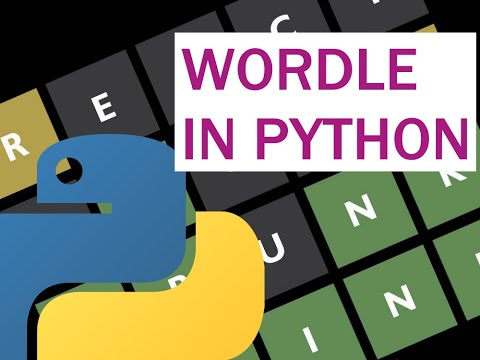

In [2]:
YouTubeVideo("9M1oDT_JLJk")

In [3]:
import requests, random
response = requests.get("https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt")
print(response.status_code)
# words
print((response.text[1000:1102]))

200
n
speed
women
metal
south
grass
scale
cells
lower
sleep
wrong
pages
ships
needs
rocks
eight
major
leve


In [4]:
words = response.text.split("\n")

In [5]:
words[1000:1010]

['drunk',
 'rests',
 'chill',
 'slain',
 'panic',
 'cords',
 'tuned',
 'crisp',
 'ledge',
 'dived']

In [6]:
random.choice("blue red green")

'e'

In [7]:
answer = random.choice(words)

In [8]:
import wordle
import imp; imp.reload(wordle)

<module 'wordle' from '/Users/mac/Documents/elite_school/wordle.py'>

In [9]:
wordle.words_play(answer.upper(), show_answer=False)

What is your guess? >  FLOOD


guess    : FLOOD
clue     : NPPNN


What is your guess? >  LOADS


guess    : LOADS
clue     : PCNNC


What is your guess? >  COALS


guess    : COALS
clue     : NCNCC


What is your guess? >  FOULS


guess    : FOULS
clue     : NCNCC


What is your guess? >  TOLLS


guess    : TOLLS
clue     : NCNCC


What is your guess? >  BOWLS


guess    : BOWLS
clue     : CCNCC


What is your guess? >  BOILS


guess    : BOILS
clue     : CCCCC
You win!
See you soon!
